# Support Vector Machine (SVM)
**Student Name:** Ashraful Islam Tanzil  
**ID:** 0112230028

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 5)


In [2]:
df = pd.read_csv('../../dataset/SEMI_SUPERVISED_LEARNING/breast_Cancer.csv')
df = df.dropna(axis=1, how='all')

X = df.iloc[:, 2:-1].values
y = df.iloc[:, 1].values

le = LabelEncoder()
y = le.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f'Training shape: {X_train.shape}')
print(f'Test shape: {X_test.shape}')

Training shape: (455, 29)
Test shape: (114, 29)


In [3]:
svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc:.4f}')
print(f'\nClassification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.9649

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



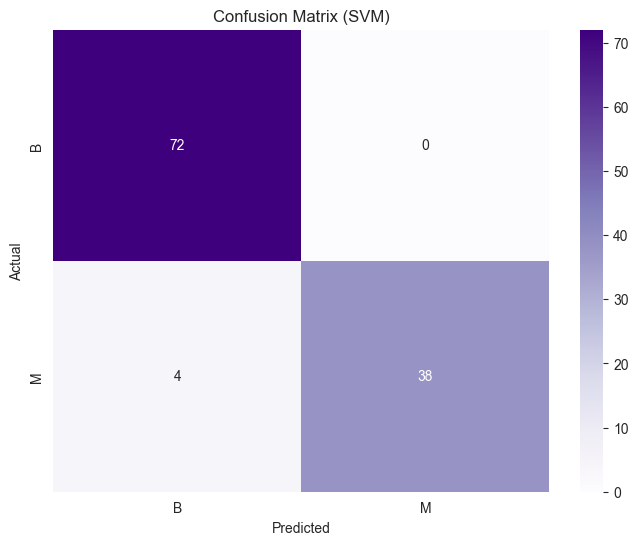

In [4]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=True,
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (SVM)')
plt.show()

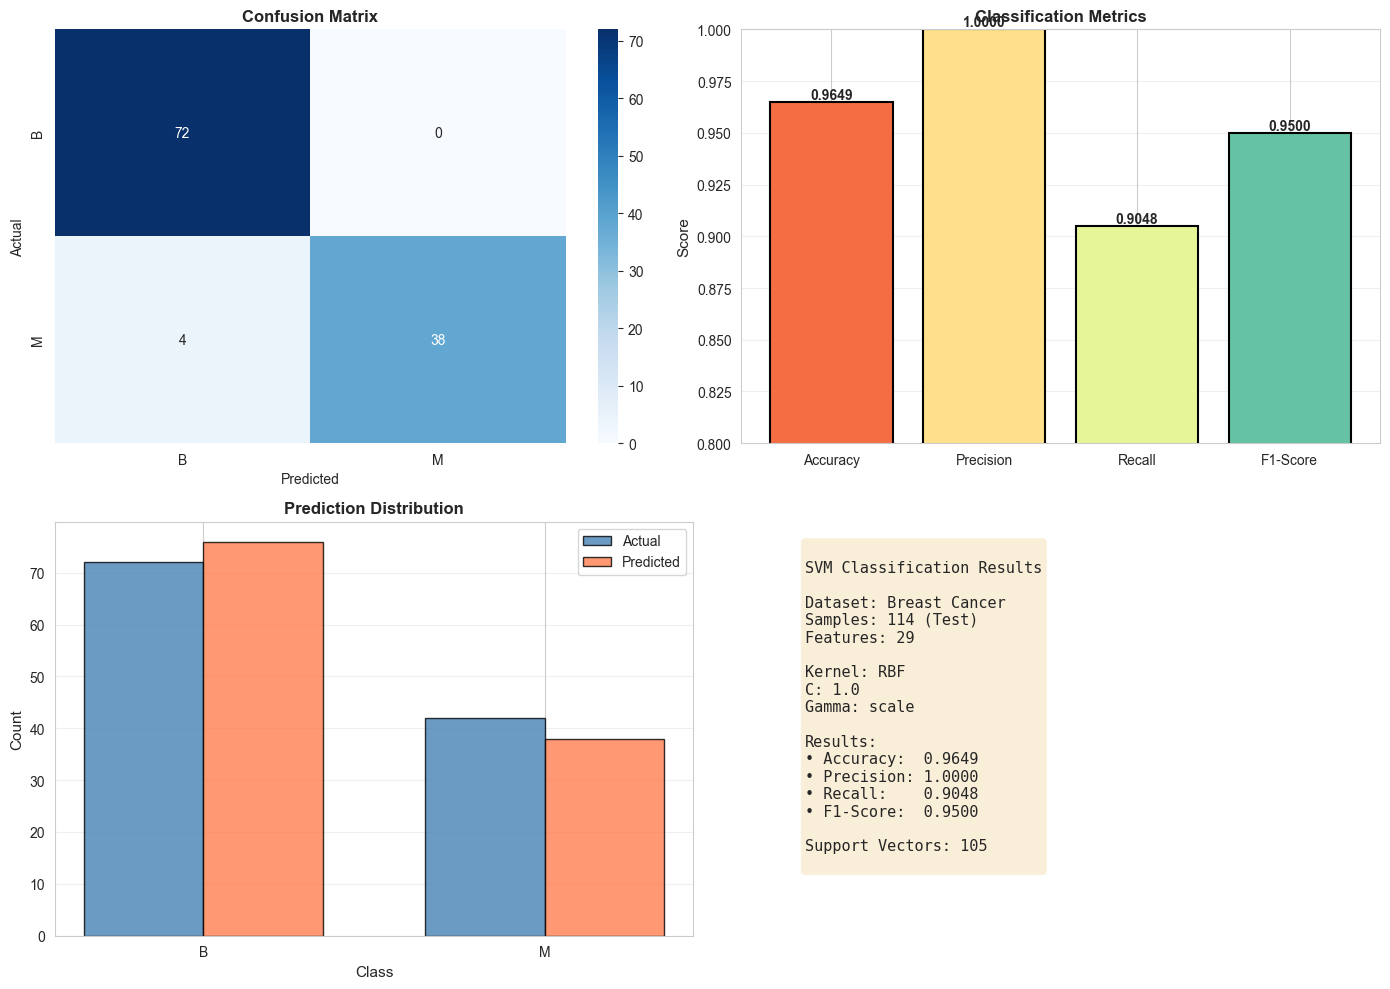


✓ Visualizations saved as 'svm_classification_summary.png'


In [5]:


fig, axes = plt.subplots(2, 2, figsize=(14, 10))


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0], cbar=True,
            xticklabels=le.classes_, yticklabels=le.classes_)
axes[0, 0].set_title('Confusion Matrix', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Actual')
axes[0, 0].set_xlabel('Predicted')


from sklearn.metrics import precision_score, recall_score, f1_score

metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-Score': f1_score(y_test, y_pred)
}

colors = plt.cm.Spectral(np.linspace(0.2, 0.8, len(metrics)))
bars = axes[0, 1].bar(metrics.keys(), metrics.values(), color=colors, edgecolor='black', linewidth=1.5)
axes[0, 1].set_ylabel('Score', fontsize=11)
axes[0, 1].set_title('Classification Metrics', fontsize=12, fontweight='bold')
axes[0, 1].set_ylim(0.8, 1.0)
axes[0, 1].grid(True, alpha=0.3, axis='y')


for bar in bars:
    height = bar.get_height()
    axes[0, 1].text(bar.get_x() + bar.get_width()/2., height,
                   f'{height:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold')


pred_counts = pd.Series(y_pred).value_counts().sort_index()
actual_counts = pd.Series(y_test).value_counts().sort_index()

x = np.arange(len(le.classes_))
width = 0.35

axes[1, 0].bar(x - width/2, actual_counts.values, width, label='Actual', 
              color='steelblue', alpha=0.8, edgecolor='black')
axes[1, 0].bar(x + width/2, pred_counts.values, width, label='Predicted', 
              color='coral', alpha=0.8, edgecolor='black')
axes[1, 0].set_xlabel('Class', fontsize=11)
axes[1, 0].set_ylabel('Count', fontsize=11)
axes[1, 0].set_title('Prediction Distribution', fontsize=12, fontweight='bold')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(le.classes_)
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3, axis='y')


summary_text = f"""
SVM Classification Results

Dataset: Breast Cancer
Samples: {X_test.shape[0]} (Test)
Features: {X_test.shape[1]}

Kernel: RBF
C: 1.0
Gamma: scale

Results:
• Accuracy:  {metrics['Accuracy']:.4f}
• Precision: {metrics['Precision']:.4f}
• Recall:    {metrics['Recall']:.4f}
• F1-Score:  {metrics['F1-Score']:.4f}

Support Vectors: {len(svm.support_vectors_)}
"""

axes[1, 1].text(0.1, 0.95, summary_text, transform=axes[1, 1].transAxes,
               fontsize=11, verticalalignment='top', fontfamily='monospace',
               bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
axes[1, 1].axis('off')

plt.tight_layout()
plt.savefig('svm_classification_summary.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Visualizations saved as 'svm_classification_summary.png'")
